In [1]:
import torch
import numpy as np


In [2]:
a = torch.zeros(3,4)

print(a)



tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


digits = load_digits()
X = digits.data        # shape (1797, 64)
y = digits.target      # labels 0–9

print("X shape:", X.shape)
print("y shape:", y.shape)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, "| Test:", X_test.shape)


X shape: (1797, 64)
y shape: (1797,)
Train: (1257, 64) | Test: (540, 64)


[ 472  217  391 1388 1382  529  787 1275  638 1611]


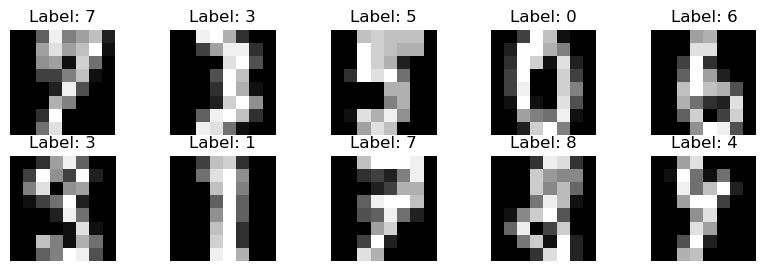

In [5]:
import matplotlib.pyplot as plt


idx = np.random.choice(len(X), 10, replace=False)
print(idx)
plt.figure(figsize=(10,3))

for i, img_idx in enumerate(idx):
    plt.subplot(2,5,i+1)
    plt.imshow(X[img_idx].reshape(-1,8), cmap="gray")
    plt.title(f"Label: {y[img_idx]}")
    plt.axis("off")

plt.show()

In [6]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.fit_transform(X_test)

#converting them to tensor

X_train_t = torch.tensor(x_train_norm,dtype=torch.float32)
X_test_t = torch.tensor(x_test_norm,dtype=torch.float32)

y_train_t = torch.tensor(y_train,dtype=torch.long)
y_test_t = torch.tensor(y_test,dtype=torch.long)


print(y_test_t.dtype,x_test_t.dtype)

NameError: name 'x_test_t' is not defined

In [70]:
def onehot(label):
    return torch.eye(10)[label]

y_train_oh = onehot(y_train_t)
y_test_oh  = onehot(y_test_t)
print(y_test_oh[:3])




tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])


In [ ]:
batch_size = 32
lr = 1e-3
epochs = 50
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
 
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i : i + batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

       
        y_pred = model.forward(X_batch)

 
        model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {model.Loss[-1]:.4f}")

Epoch 0, Loss = 0.0000
Epoch 5, Loss = 0.0000
Epoch 10, Loss = 0.0000
Epoch 15, Loss = 0.0000
Epoch 20, Loss = 0.0000
Epoch 25, Loss = 0.0000
Epoch 30, Loss = 0.0000
Epoch 35, Loss = 0.0000
Epoch 40, Loss = 0.0000
Epoch 45, Loss = 0.0000


In [7]:
class SimpleNN:
    def __init__(self, input_dim, num_neurons, num_classes=10):
        #nn.Parameter when initializing
        self.w1 = torch.randn(input_dim, num_neurons) * 0.01
        self.w1 = torch.nn.Parameter(self.w1)

        self.b1 = torch.zeros(1, num_neurons)
        self.b1 = torch.nn.Parameter(self.b1)

        self.w2 = torch.randn(num_neurons, num_classes) * 0.01
        self.w2 = torch.nn.Parameter(self.w2)

        self.b2 = torch.zeros(1, num_classes)
        self.b2 = torch.nn.Parameter(self.b2)

        self.Loss = []



    
    def ReLU(self, x):
        return torch.relu(x)

    def softmax(self, x):
        ex = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return ex / ex.sum(dim=1, keepdim=True)

    #loss cross-entropy 
    def cross_entropy(self, predicted, target):
        per_sample = -torch.sum(target * torch.log(predicted + 1e-12), dim=1)
        return per_sample.mean()

    # ---- Forward ----
    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.h1 = self.ReLU(self.z1)
        self.z2 = self.h1 @ self.w2 + self.b2
        self.y_hat = self.softmax(self.z2)
        return self.y_hat

    # ---- Backward ----
    def back_prop(self, target, lr=1e-3):

        # compute loss
        loss = self.cross_entropy(self.y_hat, target)
        self.Loss.append(loss.item())

        # clear old gradients
        for p in [self.w1, self.b1, self.w2, self.b2]:
            if p.grad is not None:
                p.grad.zero_()

     
        loss.backward()

        
        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad
            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        # re-enable grad
        self.w1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.w2.requires_grad_(True)
        self.b2.requires_grad_(True)

        return loss.item()


In [4]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23
)

# scale
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# convert to tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# one-hot
y_train_oh = torch.eye(10)[y_train_t]
y_test_oh  = torch.eye(10)[y_test_t]


In [9]:
model = SimpleNN(input_dim=64, num_neurons=100, num_classes=10)
print(model.w1.shape,'\n')
print(model.w2.shape)


torch.Size([64, 100]) 

torch.Size([100, 10])


In [10]:
batch_size = 32
lr = 0.01          
epochs = 100
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

        model.forward(X_batch)
        loss = model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")


Epoch 0, Loss = 2.3030
Epoch 5, Loss = 2.3022
Epoch 10, Loss = 2.2731
Epoch 15, Loss = 2.2800
Epoch 20, Loss = 2.2195
Epoch 25, Loss = 2.1814
Epoch 30, Loss = 2.0918
Epoch 35, Loss = 1.9220
Epoch 40, Loss = 1.6179
Epoch 45, Loss = 1.6619
Epoch 50, Loss = 1.1582
Epoch 55, Loss = 1.3060
Epoch 60, Loss = 0.8785
Epoch 65, Loss = 0.7021
Epoch 70, Loss = 0.6570
Epoch 75, Loss = 0.5273
Epoch 80, Loss = 0.5852
Epoch 85, Loss = 0.8344
Epoch 90, Loss = 0.7739
Epoch 95, Loss = 0.2197


In [11]:
y_pred = model.forward(X_test_t)
pred_labels = torch.argmax(y_pred, dim=1)

acc = (pred_labels == y_test_t).float().mean().item()
print("Test Accuracy:", acc)


Test Accuracy: 0.9203703999519348


Now classification with nn module

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



seq = nn.Sequential(
    nn.Linear(64,100),
    nn.ReLU(),
    nn.Linear(100,10)
    
)




In [14]:
seq = nn.Sequential(
    nn.Linear(64,100),
    nn.ReLU(),
    nn.Linear(100,10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(seq.parameters(),lr=1e-3)





In [ ]:
def test_step():
    seq.eval()
    with torch.no_grad():
        logits = seq(X_test_t)
        predictions = logits.argmax(dim=1)
        accuracy = (predictions == y_test_t).float().mean().item()
    return accuracy


epochs = 400
batch_size = 20
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)

    

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]
        X_batch = X_train_t[idx]
        y_batch = y_train_t[idx]
        seq.train()
        optimizer.zero_grad()

        logits = seq(X_batch)
        loss = criterion(logits,y_batch) #ce losss
    
        loss.backward()
        optimizer.step()

        lo = loss.item()

    if epoch % 5 == 0:
        acc = test_step()
        print(f"Epoch {epoch:02d} | Loss: {lo:.4f} | Test Acc: {acc:.4f}")

# ---------------------------------------------------
# 7. Final accuracy
# ---------------------------------------------------
final_acc = test_step()
print("\nFinal Test Accuracy:", final_acc)

Epoch 00 | Loss: 0.0341 | Test Acc: 0.9667
Epoch 05 | Loss: 0.0398 | Test Acc: 0.9667
Epoch 10 | Loss: 0.1370 | Test Acc: 0.9667
Epoch 15 | Loss: 0.0610 | Test Acc: 0.9667
Epoch 20 | Loss: 0.0357 | Test Acc: 0.9667
Epoch 25 | Loss: 0.0885 | Test Acc: 0.9667
Epoch 30 | Loss: 0.1095 | Test Acc: 0.9685
Epoch 35 | Loss: 0.0629 | Test Acc: 0.9667
Epoch 40 | Loss: 0.0578 | Test Acc: 0.9667
Epoch 45 | Loss: 0.0629 | Test Acc: 0.9667
Epoch 50 | Loss: 0.0509 | Test Acc: 0.9667
Epoch 55 | Loss: 0.0602 | Test Acc: 0.9667
Epoch 60 | Loss: 0.0511 | Test Acc: 0.9667
Epoch 65 | Loss: 0.0689 | Test Acc: 0.9667
Epoch 70 | Loss: 0.0470 | Test Acc: 0.9667
Epoch 75 | Loss: 0.0333 | Test Acc: 0.9667
Epoch 80 | Loss: 0.0245 | Test Acc: 0.9667
Epoch 85 | Loss: 0.0880 | Test Acc: 0.9667
Epoch 90 | Loss: 0.2546 | Test Acc: 0.9667
Epoch 95 | Loss: 0.0453 | Test Acc: 0.9667
Epoch 100 | Loss: 0.0374 | Test Acc: 0.9667
Epoch 105 | Loss: 0.0756 | Test Acc: 0.9667
Epoch 110 | Loss: 0.0827 | Test Acc: 0.9667
Epoch 11

In [18]:


with torch.no_grad():
    logtis = seq(X_test_t)
    perdiction = logtis.argmax(dim=1)
    print(perdiction)
    acc = (perdiction == y_test_t).float().mean().item()
    print(acc)

tensor([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 4, 8, 7, 8, 3, 1, 8, 8, 8, 3, 4, 2, 9,
        4, 9, 8, 1, 9, 2, 9, 7, 8, 1, 5, 5, 3, 3, 4, 5, 4, 9, 0, 4, 1, 3, 7, 6,
        5, 5, 2, 7, 3, 3, 8, 6, 1, 3, 1, 9, 5, 5, 9, 1, 6, 5, 6, 8, 1, 5, 4, 2,
        5, 8, 9, 7, 5, 4, 6, 0, 1, 0, 5, 4, 6, 8, 2, 2, 1, 4, 2, 5, 1, 5, 1, 1,
        3, 8, 5, 9, 2, 9, 8, 8, 4, 4, 6, 1, 8, 1, 8, 0, 3, 2, 4, 6, 3, 9, 6, 2,
        9, 1, 3, 4, 1, 4, 0, 7, 4, 4, 2, 0, 2, 1, 4, 8, 4, 0, 5, 0, 7, 6, 3, 5,
        9, 4, 3, 4, 5, 7, 3, 7, 8, 3, 3, 1, 5, 7, 7, 6, 2, 0, 0, 4, 1, 2, 1, 7,
        5, 1, 2, 2, 2, 6, 5, 9, 5, 9, 3, 2, 8, 9, 0, 7, 9, 2, 2, 8, 3, 1, 6, 7,
        0, 1, 4, 7, 1, 1, 0, 6, 1, 5, 4, 5, 3, 2, 6, 6, 5, 4, 8, 1, 9, 6, 1, 1,
        0, 3, 8, 5, 8, 3, 3, 8, 7, 4, 0, 6, 9, 8, 3, 8, 5, 9, 0, 6, 9, 7, 6, 6,
        2, 0, 9, 9, 5, 1, 1, 3, 9, 9, 9, 5, 7, 3, 5, 1, 3, 3, 9, 4, 1, 5, 9, 5,
        8, 9, 8, 7, 2, 5, 6, 0, 8, 5, 8, 6, 5, 0, 2, 9, 7, 0, 2, 0, 0, 4, 7, 2,
        1, 5, 2, 9, 2, 8, 2, 9, 0, 4, 2,

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

working with nn module as child-parent where mlp is chile of nn.Module

In [ ]:
class MLP(nn.Module):
    def __init__(self, input=64,hid=100,num_class = 10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input,hid),
            nn.ReLU(),
            nn.Dropout(drop_out),
            nn.Linear(hid,num_class)
        )

    

    def forward(self,X):
        return self.model(X)


mlp_model = MLP()



print(mlp_model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=64, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
#optimizer now with L2 regularization 
optimizer = optim.SGD(mlp_model.parameters(),lr=1e-3, weight_decay=1e-4)


batch_size = 20
epochs = 400
nusamples = X_train_t.shape[0]
print(nusamples)


for epoch in range(epochs):
    perm = torch.randperm(nusamples)

    for i in range(0,nusamples,batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_t[idx]

        logits = mlp_model(X_batch)
        loss = criterion(logits,y_batch)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        print(f'epoch {epoch} | loss is {loss.item():.3f}')
    



1257
epoch 0 | loss is 2.277
epoch 5 | loss is 2.279
epoch 10 | loss is 2.213
epoch 15 | loss is 2.217
epoch 20 | loss is 2.205
epoch 25 | loss is 2.160
epoch 30 | loss is 2.068
epoch 35 | loss is 2.100
epoch 40 | loss is 2.043
epoch 45 | loss is 2.011
epoch 50 | loss is 2.009
epoch 55 | loss is 1.929
epoch 60 | loss is 1.901
epoch 65 | loss is 1.875
epoch 70 | loss is 1.768
epoch 75 | loss is 1.681
epoch 80 | loss is 1.654
epoch 85 | loss is 1.701
epoch 90 | loss is 1.530
epoch 95 | loss is 1.598
epoch 100 | loss is 1.479
epoch 105 | loss is 1.464
epoch 110 | loss is 1.424
epoch 115 | loss is 1.436
epoch 120 | loss is 1.246
epoch 125 | loss is 1.163
epoch 130 | loss is 1.183
epoch 135 | loss is 1.011
epoch 140 | loss is 1.122
epoch 145 | loss is 0.928
epoch 150 | loss is 0.924
epoch 155 | loss is 1.040
epoch 160 | loss is 0.920
epoch 165 | loss is 0.970
epoch 170 | loss is 0.850
epoch 175 | loss is 0.858
epoch 180 | loss is 0.720
epoch 185 | loss is 0.846
epoch 190 | loss is 0.660
epo

In [8]:
with torch.no_grad():
    logits = mlp_model(X_test_t)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y_test_t).float().mean()

print("\nTest accuracy:", accuracy.item())


Test accuracy: 0.9277777671813965


SGD With Momentum 

In [20]:
class MLP(nn.Module):
    def __init__(self, input=64,hid=100,num_class = 10,drop_out=0.3):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input,hid),
            nn.ReLU(),
            nn.Dropout(drop_out),
            nn.Linear(hid,num_class)
        )

    

    def forward(self,X):
        return self.model(X)


mlp_model = MLP()



print(mlp_model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=64, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [21]:
def train_model(model, optimizer, criterion, X_train_t, y_train_t, batch_size=20, epochs=400):
    nusamples = X_train_t.shape[0]

    for epoch in range(epochs):
        model.train()
        perm = torch.randperm(nusamples)

        for i in range(0, nusamples, batch_size):
            idx = perm[i:i+batch_size]

            X_batch = X_train_t[idx]
            y_batch = y_train_t[idx]

            logits = model(X_batch)
            loss = criterion(logits, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 5 == 0:
            print(f"epoch {epoch} | loss = {loss.item():.4f}")


In [14]:
mlp_model = MLP(drop_out=0.1)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(
    mlp_model.parameters(),
    lr=1e-3,
    momentum=0.9,       
    weight_decay=1e-4
)

train_model(mlp_model, optimizer, criterion, X_train_t, y_train_t)


epoch 0 | loss = 2.2342
epoch 5 | loss = 1.9547
epoch 10 | loss = 1.4580
epoch 15 | loss = 1.0414
epoch 20 | loss = 0.7392
epoch 25 | loss = 0.4108
epoch 30 | loss = 0.3742
epoch 35 | loss = 0.3238
epoch 40 | loss = 0.2192
epoch 45 | loss = 0.2553
epoch 50 | loss = 0.3319
epoch 55 | loss = 0.2566
epoch 60 | loss = 0.1744
epoch 65 | loss = 0.1980
epoch 70 | loss = 0.0811
epoch 75 | loss = 0.3154
epoch 80 | loss = 0.1735
epoch 85 | loss = 0.3877
epoch 90 | loss = 0.1307
epoch 95 | loss = 0.1109
epoch 100 | loss = 0.1181
epoch 105 | loss = 0.2061
epoch 110 | loss = 0.1133
epoch 115 | loss = 0.0871
epoch 120 | loss = 0.0440
epoch 125 | loss = 0.0777
epoch 130 | loss = 0.0252
epoch 135 | loss = 0.1786
epoch 140 | loss = 0.1729
epoch 145 | loss = 0.0920
epoch 150 | loss = 0.0269
epoch 155 | loss = 0.0439
epoch 160 | loss = 0.1896
epoch 165 | loss = 0.0495
epoch 170 | loss = 0.0164
epoch 175 | loss = 0.0315
epoch 180 | loss = 0.0682
epoch 185 | loss = 0.0808
epoch 190 | loss = 0.1552
epoch 19

In [15]:
with torch.no_grad():
    logits = mlp_model(X_test_t)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y_test_t).float().mean()

print("\nTest accuracy:", accuracy.item())


Test accuracy: 0.9666666388511658


model with AdaGrad optimization function

In [18]:
mlp_model = MLP(drop_out=0.3)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adagrad(
    mlp_model.parameters(),
    lr=1e-2,         # <-- Adagrad usually needs larger LR
    weight_decay=1e-4
)

train_model(mlp_model, optimizer, criterion, X_train_t, y_train_t)

epoch 0 | loss = 1.1764
epoch 5 | loss = 0.3462
epoch 10 | loss = 0.3653
epoch 15 | loss = 0.2346
epoch 20 | loss = 0.3359
epoch 25 | loss = 0.3891
epoch 30 | loss = 0.4794
epoch 35 | loss = 0.0948
epoch 40 | loss = 0.2572
epoch 45 | loss = 0.0591
epoch 50 | loss = 0.0988
epoch 55 | loss = 0.0368
epoch 60 | loss = 0.0573
epoch 65 | loss = 0.0952
epoch 70 | loss = 0.0499
epoch 75 | loss = 0.1612
epoch 80 | loss = 0.0828
epoch 85 | loss = 0.0907
epoch 90 | loss = 0.0596
epoch 95 | loss = 0.0538
epoch 100 | loss = 0.0915
epoch 105 | loss = 0.0263
epoch 110 | loss = 0.0443
epoch 115 | loss = 0.0920
epoch 120 | loss = 0.0534
epoch 125 | loss = 0.0781
epoch 130 | loss = 0.1024
epoch 135 | loss = 0.1253
epoch 140 | loss = 0.0395
epoch 145 | loss = 0.0762
epoch 150 | loss = 0.0214
epoch 155 | loss = 0.0759
epoch 160 | loss = 0.0992
epoch 165 | loss = 0.0808
epoch 170 | loss = 0.0470
epoch 175 | loss = 0.1142
epoch 180 | loss = 0.0847
epoch 185 | loss = 0.0241
epoch 190 | loss = 0.0468
epoch 19

In [19]:
with torch.no_grad():
    logits = mlp_model(X_test_t)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y_test_t).float().mean()

print("\nTest accuracy:", accuracy.item())


Test accuracy: 0.9685184955596924


Now optimization Adam

In [22]:
mlp_model = MLP(drop_out=0.3)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    mlp_model.parameters(),
    lr=1e-3,        # good default
    weight_decay=1e-4
)

train_model(mlp_model, optimizer, criterion, X_train_t, y_train_t)



#print the final accurcy of the model
with torch.no_grad():
    logits = mlp_model(X_test_t)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y_test_t).float().mean()

print("\nTest accuracy:", accuracy.item())


epoch 0 | loss = 1.9017
epoch 5 | loss = 0.4206
epoch 10 | loss = 0.3083
epoch 15 | loss = 0.1387
epoch 20 | loss = 0.0752
epoch 25 | loss = 0.0547
epoch 30 | loss = 0.0719
epoch 35 | loss = 0.0902
epoch 40 | loss = 0.0182
epoch 45 | loss = 0.0289
epoch 50 | loss = 0.1450
epoch 55 | loss = 0.0185
epoch 60 | loss = 0.0595
epoch 65 | loss = 0.0213
epoch 70 | loss = 0.0497
epoch 75 | loss = 0.0036
epoch 80 | loss = 0.1566
epoch 85 | loss = 0.0200
epoch 90 | loss = 0.0087
epoch 95 | loss = 0.0256
epoch 100 | loss = 0.0060
epoch 105 | loss = 0.0026
epoch 110 | loss = 0.0294
epoch 115 | loss = 0.0089
epoch 120 | loss = 0.0066
epoch 125 | loss = 0.0029
epoch 130 | loss = 0.0162
epoch 135 | loss = 0.0068
epoch 140 | loss = 0.0043
epoch 145 | loss = 0.0049
epoch 150 | loss = 0.0050
epoch 155 | loss = 0.0069
epoch 160 | loss = 0.0471
epoch 165 | loss = 0.0043
epoch 170 | loss = 0.0014
epoch 175 | loss = 0.0080
epoch 180 | loss = 0.0020
epoch 185 | loss = 0.0078
epoch 190 | loss = 0.0272
epoch 19